In [1]:
import pandas as pd

In [2]:
def print_info(df, price_col):
    # Info
    print(f"Mean yoy house {price_col} change: {df['yoy_change'].mean():.2f}%")
    print(f"Median yoy house {price_col} change: {df['yoy_change'].median():.2f}%")
    print(f"Max yoy house {price_col} increase: {df['yoy_change'].max():.2f}%")
    print(f"Max yoy house {price_col} decrease: {df['yoy_change'].min():.2f}%")

    # Visualization
    df.plot.bar(x="year", y="yoy_change", figsize=(10,3));
    df.plot.line(x="year", y=price_col, figsize=(10,3));

### House price Amsterdam (1995-2021)

Evolution of Amsterdam house prices. Source: [CBS](https://www.cbs.nl/nl-nl/cijfers/detail/83913NED)

In [3]:
df = pd.read_csv('data/ams_house_price_history.csv', sep=";")
df['yoy_change'] = df['selling_price'].pct_change() * 100
df.head()

,year,region,selling_price,yoy_change
0,1995,Amsterdam,98008,NaN
1,1996,Amsterdam,110420,12.664272
2,1997,Amsterdam,126024,14.131498
3,1998,Amsterdam,151254,20.019996
4,1999,Amsterdam,189227,25.105452


Mean yoy house selling_price change: 7.35%
Median yoy house selling_price change: 7.43%
Max yoy house selling_price increase: 25.11%
Max yoy house selling_price decrease: -8.04%


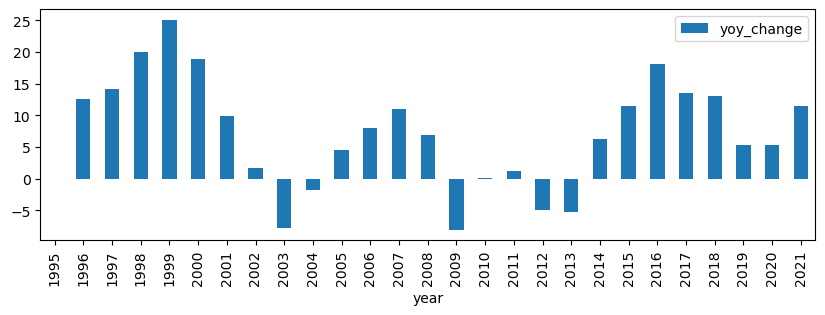

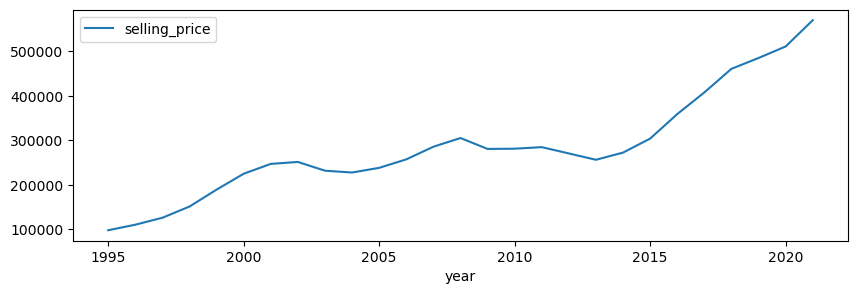

In [4]:
print_info(df, "selling_price")

In [5]:
from distfit import distfit

# Initialize model
dist = distfit()
# Fit
dist.fit_transform(df["yoy_change"].dropna(), verbose=1)
# dist.plot()
dist.summary

,distr,score,LLE,loc,scale,arg
0,dweibull,0.072827,NaN,7.530951,7.741271,"(1.4050442128563492,)"
1,loggamma,0.073164,NaN,-402.029269,88.01505,"(105.21790069615403,)"
2,t,0.073384,NaN,7.353186,8.598715,"(5875287.774007484,)"
3,norm,0.073384,NaN,7.352834,8.598681,()
4,gamma,0.073529,NaN,-311.347191,0.232707,"(1369.4633124737254,)"
5,lognorm,0.073647,NaN,-264.635269,271.944991,"(0.031490686600860074,)"
6,uniform,0.075677,NaN,-8.03916,33.144612,()
7,beta,0.075938,NaN,-8.039509,33.144961,"(0.6477154599086159, 0.7806278100520326)"
8,pareto,0.085546,NaN,-1073741832.03916,1073741824.0,"(69759757.99897105,)"
9,expon,0.085546,NaN,-8.03916,15.391995,()


### House price-per-sqm Amsterdam-oost (2011-2022)

Evolution of Amsterdam Oost house prices per sqm. Source: [NVM rapport](https://www.nvm.nl/wonen/marktinformatie/)

In [6]:
df1 = pd.read_csv('data/ams_oost_house_price_per_sqm.csv', sep=",")
df1 = df1.groupby('year')["price_per_sqm"].mean().reset_index()
df1['yoy_change'] = df1['price_per_sqm'].pct_change() * 100
df1.head()

,year,price_per_sqm,yoy_change
0,2011,3.16475,NaN
1,2012,2.78750,-11.920373
2,2013,2.77550,-0.430493
3,2014,2.98725,7.629256
4,2015,3.35400,12.277178


Mean yoy house price_per_sqm change: 7.88%
Median yoy house price_per_sqm change: 10.06%
Max yoy house price_per_sqm increase: 15.77%
Max yoy house price_per_sqm decrease: -11.92%


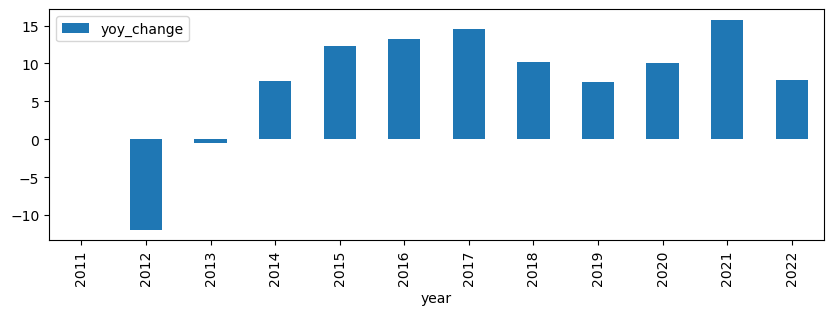

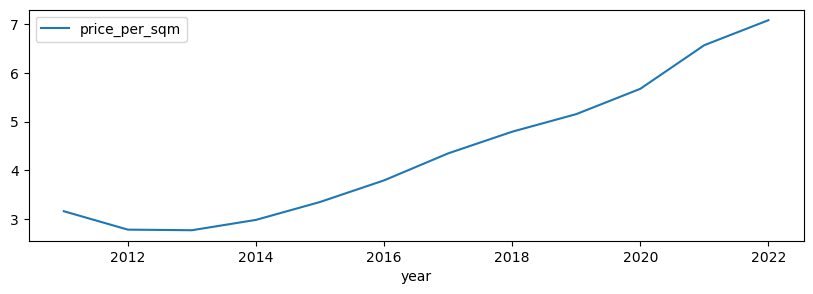

In [7]:
print_info(df1, 'price_per_sqm')

### S&P 500 historical returns

In [8]:
sp = pd.read_csv('data/sp500_history_v1.csv', sep=",")

In [9]:
# Initialize model
dist = distfit()
# Fit
dist.fit_transform(sp["yoy_change"].dropna(), verbose=1)
# dist.plot()
dist.summary

,distr,score,LLE,loc,scale,arg
0,beta,0.002891,NaN,-157.542407,231.303633,"(18.93449362239835, 6.904976144775224)"
1,loggamma,0.002891,NaN,-47.703011,41.045992,"(4.767925731919469,)"
2,norm,0.003016,NaN,11.95299,19.772233,()
3,t,0.003016,NaN,11.952795,19.771937,"(1905562.6164315366,)"
4,gamma,0.003073,NaN,-334.31944,1.180321,"(293.2445872570348,)"
5,dweibull,0.003117,NaN,9.30778,18.004323,"(1.4391747767382084,)"
6,uniform,0.005072,NaN,-43.34,97.33,()
7,pareto,0.007543,NaN,-8589934635.34,8589934592.0,"(155353050.2841858,)"
8,expon,0.007543,NaN,-43.34,55.29299,()
9,lognorm,0.007663,NaN,-43.343054,42.714103,"(1.202998763152821,)"
